<h1 align=center> Implementation of ZKP for Merkle tree Using Python</h1>

<h4 texcolor="red"> We are using python2 </h4>

In [1]:
from math import*
from csv import *
from hashlib import * 
import os
import random
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np
import csv

In [2]:
#L3=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,"Nguepi","Nguefack","Tondji"]

In [3]:
# This code allow us to integer hash  
def hashThis_int(M):
    r=0
    hash=sha256();
    hash.update(str(r).encode());
    hash.update(M.encode());
    return int(hash.hexdigest(),16);

In [4]:
hashThis_int("Nguefack")

98308941888556364773191993917330179511595787205275262433735289253208501263596L

In [5]:
## Check if the number is the power of two or not.
def Check_power_two(x):
    n=log(x)/log(2)
    if n.is_integer():
        return True
    return False

In [6]:
os.getcwd()

'/home/nguepi/Bureau/Git_repository/Projet_code/ZKP_For_Merkle_Tree'

<img src='Table_of_data1.png' />

In [10]:
#This function transform the content of csv file into a list.
def Transform_csv_file_on_list1(filePath):
    result=[]
    with open(filePath) as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            result.append(row['Name'])
    return result        

In [11]:
L=Transform_csv_file_on_list1('Data.csv')
L=L[0:4]
L

['Nguepi', 'LOWE ', 'MEITE', 'Elsa']

In [12]:
## This function allow us to solve padding probleme.
def Check_data_len(L):
    while Check_power_two(len(L))==False:
        L.append(random.randrange(0, 10000, 1))
    return L       

In [13]:
## This function allow us to hash all the elements of the list L 
def Return_Hashlist(L):
    List_result=[]
    for i in range(len(L)):
        List_result.append(sha256(str(L[i])).hexdigest())
    return List_result  

In [14]:
## This function allow us to add an element L in the dictionnary Dict at the position i
def Add_list(L,Dict,i):
    Dict[str(i)]=L
    return Dict

In [15]:
#Give the hash of the concatenation of H1 and H2.
def Add_and_hash(H1,H2):
    return sha256(str(hashThis_int(H1)+hashThis_int(H2))).hexdigest()

In [16]:
# This code allow us to build the Merkle tree using dictionary structure
def Merkle_tree(L):
    j=2
    Dict={}
    Check_data_len(L)
    Dict[str(0)]=L
    L1=Return_Hashlist(L)
    Add_list(L1,Dict,1)
    while j<=int(log(len(L))/log(2)+1):
        Lis=[]
        for i in range(((len(L1)-1)//2)+1):
            Lis.append(Add_and_hash(L1[2*i],L1[2*i+1]))
        Add_list(Lis,Dict,j) 
        L1=Lis
        j+=1  
    return Dict

In [17]:
d=Merkle_tree(L
             )

In [18]:
d

{'0': ['Nguepi', 'LOWE ', 'MEITE', 'Elsa'],
 '1': ['e21ec6bfc717c9a812c2f7b1421ff0ee0cc03d57ff3df554abe30b09741f8d19',
  'e3622a08d802d9686a8ac41313df881665e7ff3e7eaf37e415bb800154f11c75',
  '43bdbaa89296fc98f8a38c66820e16f266dcbe02738bbbccab4edb834a423463',
  'e2646b6d6d72ac4b1580ec5482204c6857fffd1f4ceadd1fae7320fffee9cac3'],
 '2': ['0de181872be9b6decb75720c0377f80464242ac06a83d1e9b44f63688a7a3487',
  '1db623a259d86d67756f29b52766d52961bbeb1324c4df0e110f035897a5d470'],
 '3': ['ff780baf3b9355b65dedd5bd9edbb7e50d27178fcc3558f80c1babc39b02f454']}

In [19]:
#This function return the element e  and  all  the  sibling  nodes  that  lie  in  the path of leaf e to the root
def Return_Elt(d,e):
    list_ = [] 
    A=d[str(int((log(len(d[str(0)]))/log(2))+1))]
    index = d[str(0)].index(e)
    if index%2==0:
        list_.append(d[str(1)][index])
        list_.append(d[str(1)][index+1])
        s = d[str(1)][index]
        t = d[str(1)][index+1]
    else:
        list_.append(d[str(1)][index-1])
        list_.append(d[str(1)][index])
        s = d[str(1)][index-1]
        t = d[str(1)][index]
    for i in range(2,int((log(len(d[str(0)]))/log(2)))+1):
        hach = Add_and_hash(s,t)
        index = d[str(i)].index(hach)
        if index%2==0:  
            list_.append(d[str(i)][index+1])
            s = d[str(i)][index]
            t = d[str(i)][index+1]
        else:
            list_.append(d[str(i)][index-1])
            s = d[str(i)][index-1]
            t = d[str(i)][index]      
    return list_,A[0]        

In [20]:
La,A=Return_Elt(d,'Nguepi')
e=La[0]
La

['e21ec6bfc717c9a812c2f7b1421ff0ee0cc03d57ff3df554abe30b09741f8d19',
 'e3622a08d802d9686a8ac41313df881665e7ff3e7eaf37e415bb800154f11c75',
 '1db623a259d86d67756f29b52766d52961bbeb1324c4df0e110f035897a5d470']

In [53]:
# This function check if the elment e belong to the tree by calculating the hash of the 
# concatenations of the hash of sibling nodes of e. 
def Check_Membership(L,e,A):
    if e not in L:
        print('{} n appartient pas a l arbre'.format(e))
    else:    
        a = L[0]
        for i in range(1,len(L)):
            b = L[i]
            a = Add_and_hash(a,b)
        if a == A:
            return  True
        else:
            return  False
Check_Membership(La,e,A)

True

In [22]:
#This code check the type of x and convert it into interger
def Convert_to_interger(x,q,d):
    if type(x)==str and x in d[str(0)]:                     
        x=hashThis_int(x)%q
        return x 
    elif type(x)!=str and x in d[str(0)] :
        x=x
        return x 
    else:
        return -1

In [23]:
type(Convert_to_interger('Nguepi',5,d))

long

In [24]:
## Check if the number is prime or not
def Is_prime(p):
    result=[]
    j=0
    for i in range(1,p+1):
        if p%i==0:
            j+=1
    if j==2:
        return True
    return False 

In [25]:
#This is verifier challenge function
def verifier_challenge(p):
    if Is_prime(p):
        return random.randint(1,p-1)
    print("Veillez etrer un nombre premier!!!!")

In [26]:
#This function allows us to decompose the tree given by the above dictionary structure into pairs of father and son nodes.
resul=[]
n=int(log(len(d[str(0)]))/log(2))+1
for j in range(n,1,-1):
    for i in range(len(d[str(j)])):
        if i==0:
            resul.append((d[str(j)][i],(d[str(j-1)][i])))
            resul.append((d[str(j)][i],(d[str(j-1)][i+1])))
        else:
            resul.append((d[str(j)][i],(d[str(j-1)][2*i])))
            resul.append((d[str(j)][i],(d[str(j-1)][2*i+1])))
for k in range(len(d[str(0)])):
    resul.append((d[str(1)][k],(d[str(0)][k])))
resul            

[('ff780baf3b9355b65dedd5bd9edbb7e50d27178fcc3558f80c1babc39b02f454',
  '0de181872be9b6decb75720c0377f80464242ac06a83d1e9b44f63688a7a3487'),
 ('ff780baf3b9355b65dedd5bd9edbb7e50d27178fcc3558f80c1babc39b02f454',
  '1db623a259d86d67756f29b52766d52961bbeb1324c4df0e110f035897a5d470'),
 ('0de181872be9b6decb75720c0377f80464242ac06a83d1e9b44f63688a7a3487',
  'e21ec6bfc717c9a812c2f7b1421ff0ee0cc03d57ff3df554abe30b09741f8d19'),
 ('0de181872be9b6decb75720c0377f80464242ac06a83d1e9b44f63688a7a3487',
  'e3622a08d802d9686a8ac41313df881665e7ff3e7eaf37e415bb800154f11c75'),
 ('1db623a259d86d67756f29b52766d52961bbeb1324c4df0e110f035897a5d470',
  '43bdbaa89296fc98f8a38c66820e16f266dcbe02738bbbccab4edb834a423463'),
 ('1db623a259d86d67756f29b52766d52961bbeb1324c4df0e110f035897a5d470',
  'e2646b6d6d72ac4b1580ec5482204c6857fffd1f4ceadd1fae7320fffee9cac3'),
 ('e21ec6bfc717c9a812c2f7b1421ff0ee0cc03d57ff3df554abe30b09741f8d19',
  'Nguepi'),
 ('e3622a08d802d9686a8ac41313df881665e7ff3e7eaf37e415bb800154f11c75', '

In [27]:
def Split_tree_into_node1(d):
    resul1=[]
    n=int(log(len(d[str(0)]))/log(2))+1
    for j in range(n,1,-1):
        for i in range(len(d[str(j)])):
            if i==0:
                resul1.append((d[str(j)][i],(d[str(j-1)][i])))
                resul1.append((d[str(j)][i],(d[str(j-1)][i+1])))
            else:
                resul1.append((d[str(j)][i],(d[str(j-1)][2*i])))
                resul1.append((d[str(j)][i],(d[str(j-1)][2*i+1])))
    for k in range(len(d[str(0)])):
        resul.append((d[str(1)][k],(d[str(0)][k])))
    return resul 

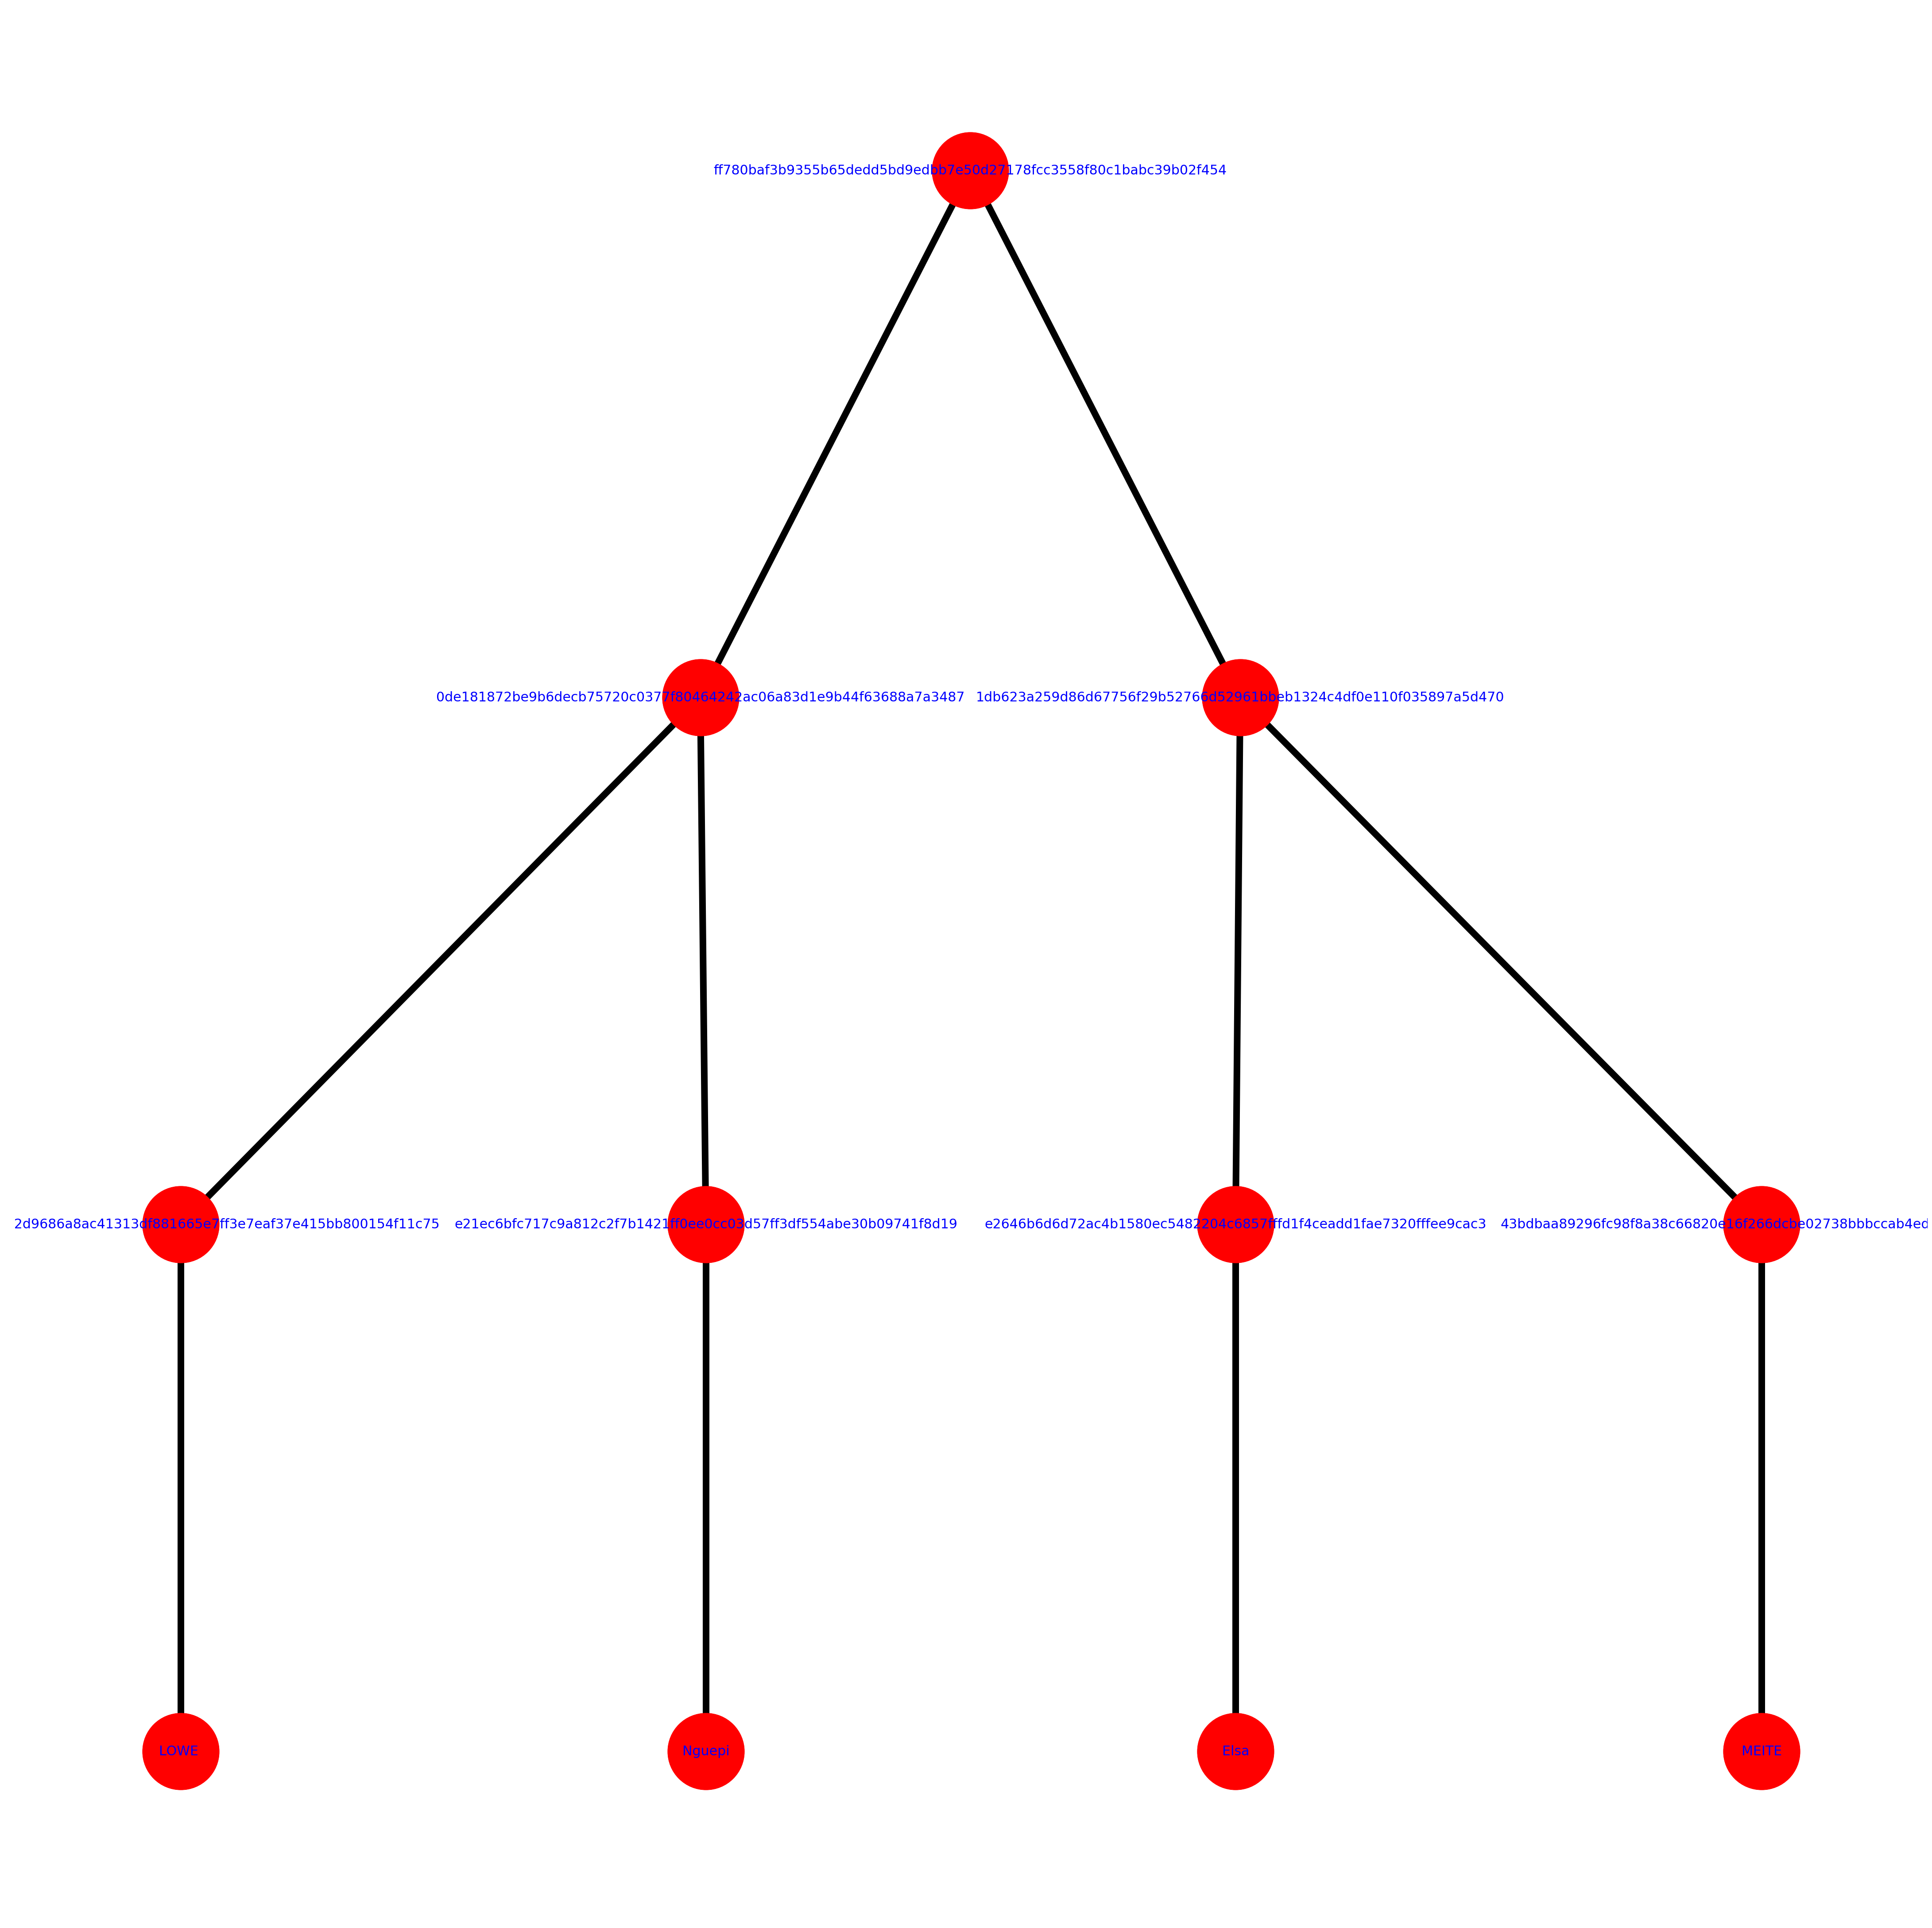

In [52]:
#This function allows us to draw the tree
plt.figure(figsize=(60,60))
def Draw_tree():
        # Create a directed graph
        G = nx.DiGraph()
        Edges=resul 
       
        # Build up a graph
        for t in Edges:
            G.add_edge(t[0],t[1])

     
        # Plot trees
        pos=graphviz_layout(G, prog='dot')
        nx.draw(G, pos, with_labels=True, arrows=False,font_size=30,node_size=30000, font_color='b',width=15 )
        
        plt.savefig('draw_trees_with_pygraphviz.png', bbox_inches='tight')   
        plt.show()
Draw_tree()

In [33]:
# This is the prover algorithm
def prover(q,g,h,x,r,d):
    if not Is_prime(q):
        print('{} is not prime!!!!'.format(q))
    elif Convert_to_interger(x,q,d)==-1: 
        print('This element is not in the list!!!!')
    else:    
        con_val=Convert_to_interger(x,q,d)
        C=(pow(g,con_val)*pow(h,r))
        k=random.randint(1,q-1)
        t=random.randint(1,q-1)    
        c=verifier_challenge(q)    ## this is the challenge
        R=(int(pow(g,k)*pow(h,t)))
        z=(k-c*con_val)
        y=(t-c*r)
        pi,A=Return_Elt(d,x) ## d represent the Merkle tree
        elt=sha256(str(x)).hexdigest()
        return C,c,z,y,R,pi,A,elt

In [34]:
prover(5,3,2,'Nguepi',3,d)

(24.0,
 3,
 -1L,
 -7,
 36,
 ['e21ec6bfc717c9a812c2f7b1421ff0ee0cc03d57ff3df554abe30b09741f8d19',
  'e3622a08d802d9686a8ac41313df881665e7ff3e7eaf37e415bb800154f11c75',
  '1db623a259d86d67756f29b52766d52961bbeb1324c4df0e110f035897a5d470'],
 'ff780baf3b9355b65dedd5bd9edbb7e50d27178fcc3558f80c1babc39b02f454',
 'e21ec6bfc717c9a812c2f7b1421ff0ee0cc03d57ff3df554abe30b09741f8d19')

In [42]:
# this is the verifier Algorithm
def verifier(C,c,z,y,R,pi,A,elt,g,h):
    r=int(pow(C,c)*pow(g,z)*pow(h,y))
    bol=Check_Membership(pi,elt,A)
    if (R==r and bol==True):
        
        return True
    return False

In [43]:
verifier(C,c,z,y,R,pi,A,elt,g,h)

True

In [50]:
def __main__():
    
    p=11 #p=11 generateur=2 7
    h=2
    g=3  
    q=5
    x='Nguepi'
    r=3
    Data= d
    C,c,z,y,R,pi,A,elt=prover(q,g,h,x,r,d)
    if verifier(C,c,z,y,R,pi,A,elt,g,h)==True:
        print("{} belong to Data".format(elt))
    else:
        print("{} is not in Data".format(elt))
__main__()

e21ec6bfc717c9a812c2f7b1421ff0ee0cc03d57ff3df554abe30b09741f8d19 belong to Data


# End of Demo